# Robotic Systems II (ECE-DK904)

## Electrical and Computer Engineering Department, University of Patras, Greece

**Instructor:** Konstantinos Chatzilygeroudis (costashatz@upatras.gr)

## Lab 4

### Deterministic Optimal Control

${\arg\!\min}_{\boldsymbol{x}(t), \boldsymbol{u}(t)}\mathcal{J}(\boldsymbol{x}(t), \boldsymbol{u}(t)) = \int_{t_0}^{t_f}\ell(\boldsymbol{x}(t), \boldsymbol{u}(t))dt + \ell_F(\boldsymbol{x}(t_f))$

$\quad\quad\text{s.t.}\quad\quad\dot{\boldsymbol{x}}(t) = f(\boldsymbol{x}(t), \boldsymbol{u}(t))$

where:

- $\boldsymbol{x}(t)\in\mathbb{R}^N, \boldsymbol{u}(t)\in\mathbb{R}^M$ are the state and control trajectories
- $\mathcal{J}(\boldsymbol{x}(t), \boldsymbol{u}(t))$ is the "cost function"
- $\ell(\boldsymbol{x}(t), \boldsymbol{u}(t))$ is the "stage cost"
- $\ell_F(\boldsymbol{x}(t_f))$ is the "terminal cost"
- $\dot{\boldsymbol{x}}(t) = f(\boldsymbol{x}(t), \boldsymbol{u}(t))$ are the "dynamics constraints"
- We can potentially add more constraints (e.g. torque limits)

As we saw in the lectures, this version of the problem is not always useful because it is infinite dimensional! So we usually discretize:

${\arg\!\min}_{\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}}\mathcal{J}(\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}) = \sum_{k=1}^{K-1}\ell(\boldsymbol{x}_k, \boldsymbol{u}_k) + \ell_F(\boldsymbol{x}_K)$

$\quad\quad\text{s.t.}\quad\quad\boldsymbol{x}_{k+1} = f_{\text{discrete}}(\boldsymbol{x}_k, \boldsymbol{u}_k)$

where $\boldsymbol{x}_k\in\mathbb{R}^N$ and $\boldsymbol{u}_k\in\mathbb{R}^M$ are now vectors!

### Linear Quadratic Regulator as QP

${\arg\!\min}_{\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}}\mathcal{J}(\boldsymbol{x}_{1:K}, \boldsymbol{u}_{1:K-1}) = \sum_{k=1}^{K-1}\Big(\frac{1}{2}\boldsymbol{x}_k^T\boldsymbol{Q}_k\boldsymbol{x}_k + \frac{1}{2}\boldsymbol{u}_k^T\boldsymbol{R}_k\boldsymbol{u}_k\Big) + \frac{1}{2}\boldsymbol{x}_K^T\boldsymbol{Q}_K\boldsymbol{x}_K$

$\quad\quad\text{s.t.}\quad\boldsymbol{x}_{k+1} = \boldsymbol{A}_k\boldsymbol{x}_k +\boldsymbol{B}_k\boldsymbol{u}_k$

$\quad\quad\quad\quad\boldsymbol{Q}_k\succeq 0$

$\quad\quad\quad\quad\boldsymbol{R}_k\succ 0$

- Widely used in many real applications
- The *workhorse* of optimal control
- We know everything about it!
- Infinite variations and extensions!
- **Time Invariant** if: $\boldsymbol{A}_k = \boldsymbol{A}, \boldsymbol{B}_k = \boldsymbol{B}, \boldsymbol{Q}_k = \boldsymbol{Q}, \boldsymbol{R}_k = \boldsymbol{R}, \forall k$

LQR is actually a QP problem per time-step. **But also for all steps**! How can we write it as a QP?

$\boldsymbol{z} = \begin{bmatrix}\boldsymbol{u}_1\\\boldsymbol{x}_2\\\boldsymbol{u}_2\\\vdots\\\boldsymbol{x}_K\end{bmatrix}, \boldsymbol{H} = \begin{bmatrix}\boldsymbol{R}_1 & & & &\\& \boldsymbol{Q}_2 & & &\\& & \boldsymbol{R}_2 & &\\& & & \ddots &\\& & & & \boldsymbol{Q}_K\end{bmatrix}$

$\underbrace{\begin{bmatrix}
                \boldsymbol{B}_1 & -\boldsymbol{I} & \boldsymbol{0} & \dots & & & &\\
                \boldsymbol{0} & \boldsymbol{A}_2 & \boldsymbol{B}_2 & -\boldsymbol{I} & \boldsymbol{0} & \dots & &\\
                & & & \ddots & & & & &\\
                & & & & & & \boldsymbol{A}_{K-1} & \boldsymbol{B}_{K-1} & -\boldsymbol{I}
            \end{bmatrix}}_{\boldsymbol{G}}
            \begin{bmatrix}\boldsymbol{u}_1\\\boldsymbol{x}_2\\\boldsymbol{u}_2\\\vdots\\\boldsymbol{x}_K\end{bmatrix}
            =
            \underbrace{\begin{bmatrix}-\boldsymbol{A}_1\boldsymbol{x}_1\\\boldsymbol{0}\\\boldsymbol{0}\\\vdots\\\boldsymbol{0}\end{bmatrix}}_{\boldsymbol{d}}$

And we have:

${\arg\!\min}_{\boldsymbol{z}}\mathcal{J}(\boldsymbol{z}) = \frac{1}{2}\boldsymbol{z}^T\boldsymbol{H}\boldsymbol{z}$

$\quad\quad\text{s.t.}\quad\boldsymbol{G}\boldsymbol{z}-\boldsymbol{d} = \boldsymbol{0}$

We can solve this very easily with our **optimization tools**. We first write the Lagrangian:

$\mathcal{L}(\boldsymbol{z}, \boldsymbol{\lambda}) = \frac{1}{2}\boldsymbol{z}^T\boldsymbol{H}\boldsymbol{z} + \boldsymbol{\lambda}^T(\boldsymbol{G}\boldsymbol{z}-\boldsymbol{d})$

And then the **KKT Conditions**:

$\nabla_{\boldsymbol{z}}\mathcal{L} = \boldsymbol{H}\boldsymbol{z} + \boldsymbol{G}^T\boldsymbol{\lambda} = \boldsymbol{0}$

$\nabla_{\boldsymbol{\lambda}}\mathcal{L} = \boldsymbol{G}\boldsymbol{z}-\boldsymbol{d} = \boldsymbol{0}$

And we get the **KKT System**:

$\begin{bmatrix}
                \boldsymbol{H} & \boldsymbol{G}^T\\
                \boldsymbol{G} & \boldsymbol{0}
            \end{bmatrix}
            \begin{bmatrix}
                \boldsymbol{z}\\
                \boldsymbol{\lambda}
            \end{bmatrix}
            =
            \begin{bmatrix}
                \boldsymbol{0}\\
                \boldsymbol{d}
            \end{bmatrix}$

which we can solve with one **np.linalg.solve()**!!

### Double Integrator with LQR

Let's control the **Double Integrator** with LQR!

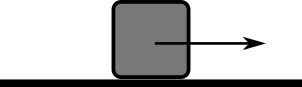

Let's first write down the dynamics and helper functions!

In [35]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [36]:
# Double Integrator dynamics
dt = 0.1
m = 1.
A = np.array([[1., dt], [0., 1.]])
B = np.array([[1./(2.*m)*dt*dt], [dt/m]])

In [37]:
N = 2 # dimension of state
M = 1 # dimension of action
tf = 5. # total time
K = int(tf/dt) + 1

# Cost
Q = np.eye(N)
R = 0.1 * np.eye(M)
QN = np.eye(N)

In [38]:
def rollout(x0, us):
    x = np.copy(x0)

    states = [np.copy(x)]
    for k in range(K-1):
        x = A @ x + B @ us[k]
        states.append(np.copy(x))
    
    return states

def cost(xs, us):
    c = 0.5 * xs[-1].T @ QN @ xs[-1]
    for k in range(K-1):
        c += 0.5 * xs[k].T @ Q @ xs[k]
        c += 0.5 * us[k].T @ R @ us[k]
    return c[0][0]

Let's start from 1m away from the center and see what the cost of taking no action (aka zero) does:

In [39]:
# initial state
x0 = np.array([[1.], [0.]])

# Book-keeping
us = [np.zeros((M, 1)) for _ in range(K-1)]

# Zero actions cost
states = rollout(x0, us)
print(cost(states, us))

25.5


OK. Now we are ready to write LQR as a QP! We start by writing the $\boldsymbol{H}$ matrix:

In [40]:
H = np.zeros(((K-1)*(M+N), (K-1)*(M+N)))

### TO-DO: Fill H with correct values
for k in range(K-1):
    H[k*(M+N)+M:(k+1)*(M+N), k*(M+N)+M:(k+1)*(M+N)] = Q
    H[    k*(M+N):k*(M+N)+M,     k*(M+N):k*(M+N)+M] = R

H[-N:, -N:] = QN
### END of TO-DO

Now let's do the $\boldsymbol{G}$ matrix:

In [41]:
size = (K-1)*(M+N)
G = np.zeros(((K-1) * N, size))

### TO-DO: Fill G with correct values
for k in range(K-1):
    G[ k*N:(k*N)+N,     k*(M+N):k*(M+N)+M] = -B
    if(k > 0): G[ k*N:(k*N)+N,     k*(M+N)-N:k*(M+N)] = -A
    G[ k*N:(k*N)+N, k*(M+N)+M:k*(M+N)+M+N] = np.eye(N)
### END of TO-DO

And last but not least, let's fill up the $\boldsymbol{d}$ vector:

In [42]:
d = np.zeros(((K-1) * N, 1))

### TO-DO: Fill d with correct values
d[0:N, :] = A @ x0
### END of TO-DO

Now we are ready to create the **KKT Matrix** and vector:

In [43]:
rows = H.shape[0] + G.shape[0]
cols = H.shape[1] + G.shape[0]

kkt_matrix = np.zeros((rows, cols))

### TO-DO: Fill kkt_matrix with correct values
kkt_matrix[:H.shape[0], :H.shape[1]] = H
kkt_matrix[:H.shape[0], H.shape[1]:] = G.T
kkt_matrix[H.shape[0]:, :H.shape[1]] = G
### END of TO-DO

v = np.zeros((kkt_matrix.shape[0], 1))
### TO-DO: Fill v with correct values
v[H.shape[0]:, :] = d
### END of TO-DO

# We solve the whole LQR prolem with one linear solve!!
Z = np.linalg.solve(kkt_matrix, v)

We now have all the solution in the `Z` variable! We need to decompose into states and controls to visualize the output:

In [44]:
### TO-DO: us should be a list with all the actions
us = [Z[k*(M+N):k*(M+N)+M] for k in range(K-1)]
### END of TO-DO

### TO-DO: states should be a list with all the states
states = [x0] + [Z[k*(M+N)+M:(k+1)*(M+N)] for k in range(K-1)]
### END of TO-DO

print(cost(states, us)) # You should see 6.6581331663807415

6.6581331663807415


Let's visualize the trajectory!

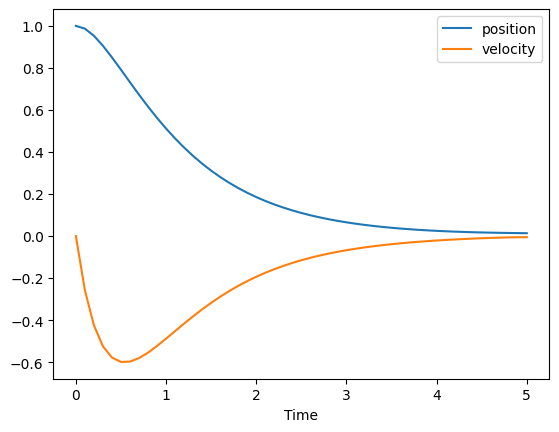

In [45]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();

We can also visualize the controls:

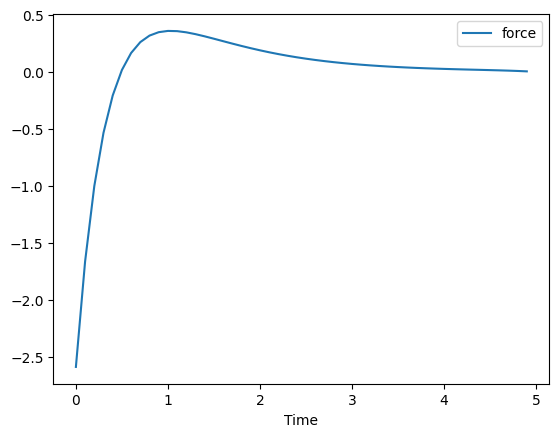

In [46]:
plt.close()
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K-1)], [us[k][0,0] for k in range(K-1)], label="force")

plt.xlabel("Time")

plt.legend();

### Linear Quadratic Regulator via Riccati Recursion

During the lectures we saw that we can also solve the LQR problem more efficiently! By using the following recursion:

$\boldsymbol{P}_K = \boldsymbol{Q}_K$

$\boldsymbol{K}_k = (\boldsymbol{R}_k + \boldsymbol{B}_k^T\boldsymbol{P}_{k+1}\boldsymbol{B}_k)^{-1}\boldsymbol{B}_k^T\boldsymbol{P}_{k+1}\boldsymbol{A}_k$

$\boldsymbol{P}_k = \boldsymbol{Q}_k+\boldsymbol{A}_k^T\boldsymbol{P}_{k+1}(\boldsymbol{A}_k-\boldsymbol{B}_k\boldsymbol{K}_k)$

This is called the Riccati Recursion and derives directly from our QP formulation, but the complexity is $O(K(N+M)^3)$ instead of $O(K^3(N+M)^3)$ of the original QP. We also get *for free* feedback controllers ($\boldsymbol{K}_k$).

Let's implement this for the double integrator:

In [73]:
# initial state
x0 = np.array([[1.], [0.]])

# Book-keeping
us = [np.zeros((M, 1)) for _ in range(K-1)]

# Zero actions cost
states = rollout(x0, us)
print(cost(states, us))

116230769323567.84


In [74]:
# Init
Ps = [np.zeros((N, N))]*K
Ks = [np.zeros((M, N))]*(K-1)

# Riccati backward
Ps[K-1] = QN
for k in range(K-2, -1, -1):
    ### TO-DO: Implement the Riccati recursion
    Kk = np.linalg.inv(R + B.T @ Ps[k+1] @ B) @ B.T @ Ps[k+1] @ A
    Ps[k] = Q + A.T @ Ps[k+1] @ (A - B @ Kk)
    Ks[k] = Kk
    ### END of TO-DO

Let's do some forward simulation!! Remember we now have a feedback controller instead of an open-loop solution!

In [75]:
# Forward simulation
x = np.copy(x0)
states = [np.copy(x)]
us = []
for k in range(K-1):
    u_new = -Ks[k] @ x
    x = A @ x + B @ u_new
    states.append(np.copy(x))
    us.append(np.copy(u_new))

print(cost(states, us)) # You should see 6.6581331663807415

13.764863067090143


Let's see how the solution looks like:

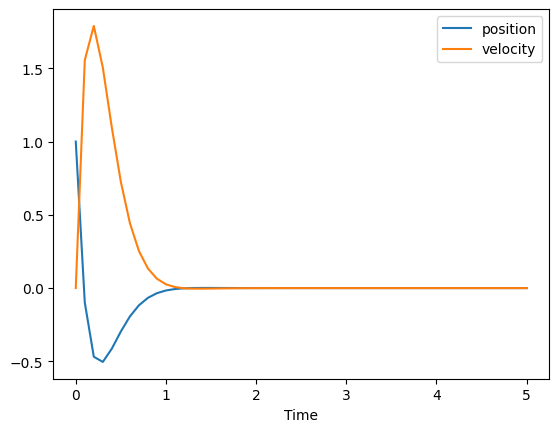

In [76]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();

Exactly the same as before but now we also have the feedback controllers and we can compute it faster! Cool! Let's add some noise to the system and see how our controllers behave:

In [77]:
# Forward with noise!
x = np.copy(x0)
states = [np.copy(x)]
us = []
for k in range(K-1):
    u_new = -Ks[k] @ x
    x = A @ x + B @ u_new + 0.01 * np.random.randn(N, 1)
    states.append(np.copy(x))
    us.append(np.copy(u_new))

print(cost(states, us))

13.882608235447654


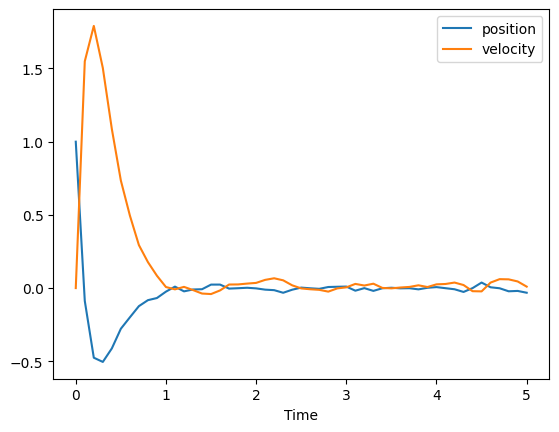

In [78]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();

Pretty awesome! We converge to the goal even with noise!

### Pendulum System

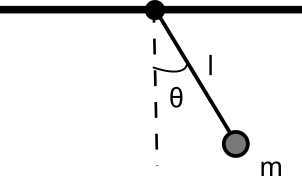

Now let's try to control a more difficult system. Let's remind ourselves the equations of the pendulum:

$\boldsymbol{x} = \begin{bmatrix}\theta\\\dot{\theta}\end{bmatrix}$

$\boldsymbol{u} = \tau\in\mathbb{R}$

$\dot{\boldsymbol{x}} = \begin{bmatrix}\dot{\theta}\\\frac{-g}{l}\text{sin}\theta+\frac{1}{ml^2}\boldsymbol{u}\end{bmatrix}$

where $g$ is the gravity, $l$ is the length of the pendulum pole and $m$ is the mass of the tip of the pole.

We will try to solve with LQR the stabilization of the pendulum around $\theta=\pi$. The **linearized system** around $\theta=\pi$ is as follows:

$\dot{\boldsymbol{x}} = \begin{bmatrix}\dot{\theta}\\\frac{g}{l}\theta+\frac{1}{ml^2}\boldsymbol{u}\end{bmatrix}$. So first, let's decompose the system into $\boldsymbol{A}$ and $\boldsymbol{B}$ matrices (since it is now linear and control affine):

In [79]:
g = 9.81
l = 1.
m = 1.
### TO-DO: Write the A and B matrices for the linearized pendulum
A = np.array([[0., 1.], [g/l, 0.]])
B = np.array([[0, 1/(m*(l**2))]]).T
### END of TO-DO

We now have to discretize the system. We can do this by writing doing Semi-Implicit Euler *analytically*:

In [80]:
import scipy

dt = 0.1
### TO-DO: Write the new A and B matrices for the linearized pendulum that implement the discretization
### (you should not need to use the old A & B; they were there to help you understand)
A = scipy.linalg.expm(A*dt)
B = np.linalg.inv(A) @ (A-np.eye(2)) @ B
### END of TO-DO

N = 2 # dimension of state
M = 1 # dimension of action
tf = 5. # total time
K = int(tf/dt) + 1

Now we can do LQR! Let's copy it from the previous section:

In [81]:
# Init
Ps = [np.zeros((N, N))]*K
Ks = [np.zeros((M, N))]*(K-1)

# Riccati backward
Ps[K-1] = QN
for k in range(K-2, -1, -1):
    ### TO-DO: Implement the Riccati recursion
    Kk = np.linalg.inv(R + B.T @ Ps[k+1] @ B) @ B.T @ Ps[k+1] @ A
    Ps[k] = Q + A.T @ Ps[k+1] @ (A - B @ Kk)
    Ks[k] = Kk
    ### END of TO-DO

In [82]:
# We need to simulate with the actual non linear dynamics
def pendulum_dynamics(x, u):
    g = 9.81
    l = 1.
    m = 1.
    x_dot = np.concatenate([x[1:], -(g/l)*np.sin(x[:1]) + 1./(m*l*l)*u], axis=0)
    return x_dot

def pendulum_rk4(x, u, dt = 0.05):
    f1 = pendulum_dynamics(x, u)
    f2 = pendulum_dynamics(x + 0.5 * dt * f1, u)
    f3 = pendulum_dynamics(x + 0.5 * dt * f2, u)
    f4 = pendulum_dynamics(x + dt * f3, u)
    x_n = x + (dt/6.)*(f1 + 2. * f2 + 2. * f3 + f4)
    return x_n

# Forward simulation
x0 = np.array([[np.pi, 0.]]).T
x = np.copy(x0)
states = [np.copy(x)]
us = []
for k in range(K-1):
    u_new = -Ks[k] @ x
    # Simulate with the actual dynamics
    x = pendulum_rk4(x, u_new, dt)
    states.append(np.copy(x))
    us.append(np.copy(u_new))

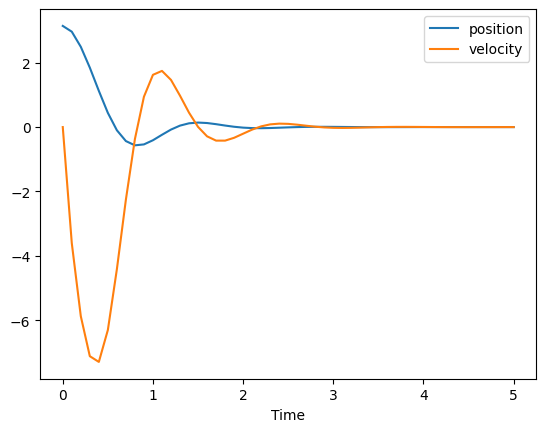

In [83]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();

Wait! What!? Why is it converging to $\theta=0$? **Because LQR's goal is to make all the state variables to go to zero!!** Let's fix that:

In [98]:
# Forward simulation
x_ref = np.array([[np.pi, 0.]]).T
u_ref = np.array([[0.]])
### TO-DO: Once you have a working controller, play around with different initial conditions!
x0 = np.array([[0., 0.]]).T
### END of TO-DO
x = np.copy(x0)
states = [np.copy(x)]
us = []
for k in range(K-1):
    ### TO-DO: Fix the computation of the control input
    u_new = -Ks[k] @ (x - x_ref) + u_ref
    ### END of TO-DO
    # Simulate with the actual dynamics
    x = pendulum_rk4(x, u_new, dt)
    states.append(np.copy(x))
    us.append(np.copy(u_new))

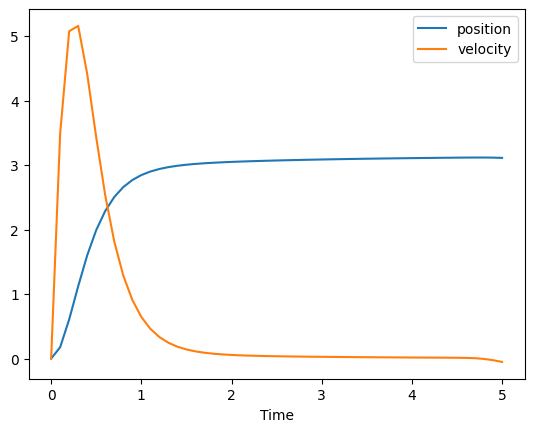

In [99]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();

Now let's plot the $\boldsymbol{K}$ matrices that LQR has found!

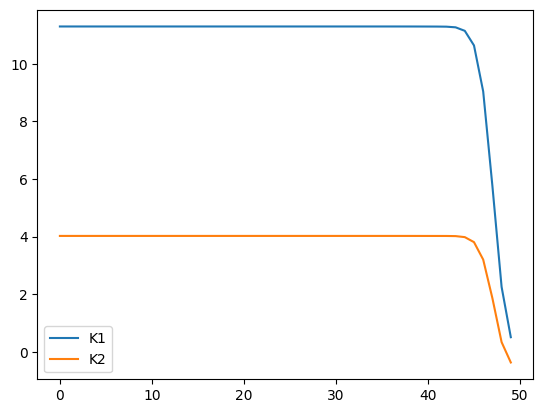

In [100]:
# Plot K's
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k for k in range(K-1)], [Ks[k][0, 0] for k in range(K-1)], label="K1")
ax.plot([k for k in range(K-1)], [Ks[k][0, 1] for k in range(K-1)], label="K2")

plt.legend();

What do you observe? The further away we are from the target (final point), the $\boldsymbol{K}$ matrices converge to fixed values! The same holds for the $\boldsymbol{P}$ matrices.

Overall, if the dynamics of our system do not change over time and we have a *stabilizing controller* (aka going to a single point), then we can solve the LQR problem as an **Infinite Horizon LQR** problem. In practice, we use routines that compute the $\boldsymbol{K}$ and $\boldsymbol{P}$ matrices of the infinite horizon LQR problem and use those to control our systems. This would be equivalent to take `K[0]` in our example. Let's try this:

In [105]:
# Forward simulation
x_ref = np.array([[np.pi, 0.]]).T
u_ref = np.array([[0.]])
### TO-DO: Once you have a working controller, play around with different initial conditions!
x0 = np.array([[0.3, 0.]]).T
### END of TO-DO
x = np.copy(x0)
states = [np.copy(x)]
us = []
for k in range(K-1):
    ### TO-DO: Implement the infinite horizon controller
    u_new = -Ks[0] @ (x - x_ref) + u_ref
    ### END of TO-DO
    # Simulate with the actual dynamics
    x = pendulum_rk4(x, u_new, dt)
    states.append(np.copy(x))
    us.append(np.copy(u_new))

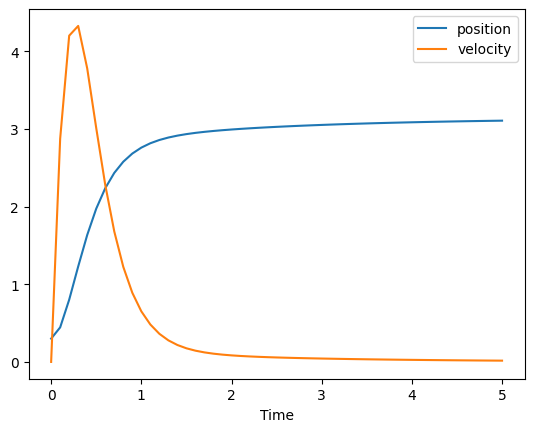

In [106]:
fig = plt.figure()  # no frame
ax = fig.add_subplot(1, 1, 1)

ax.plot([k * dt for k in range(K)], [states[k][0, 0] for k in range(K)], label="position")
ax.plot([k * dt for k in range(K)], [states[k][1, 0] for k in range(K)], label="velocity")

plt.xlabel("Time")

plt.legend();